In [614]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from scipy.optimize import linear_sum_assignment


def make_name(parameters):
    return "_".join(parameters[0]) + "_" + "_".join(parameters[1])


def read_from(r, parameter_sets, state_cutoff=10):
    data = []
    norm = np.var(pd.read_csv(f"ai_data/{r}.csv"))
    ai_df = pd.read_csv(f"ai_data/{r}.csv")
    for parameters in parameter_sets:
        for i in range(10):
            pname = make_name(parameters)
            fname = f"model_data_{state_cutoff}_1.0/{pname}_{i}_{r}.hdf5"
            if not os.path.exists(fname):
                continue
            with h5py.File(fname, 'r') as f:
                ntest = f['nstates_test'][()]
                ntrain = f['nstates_train'][()]
                distance = f["distance"][:]
                test_states = f["state_ind_for_test"][:]
                row_ind, col_ind = linear_sum_assignment(distance)
                row_ind = row_ind[:ntest+ntrain]
                col_ind = col_ind[:ntest+ntrain]
                print(row_ind, col_ind)
                print(np.sum(distance[test_states, col_ind[test_states]]), f['train_loss'][()])
                better_test_loss = np.sum(distance[test_states, col_ind[test_states]])/ntest
                data.append({
                    'name': pname,
                    'Parameters':pname.replace("_", ",").replace("E0,", ""),
                    'cviteration': i,
                    'test_sloss': f['test_sloss'][()],
                    'test_loss': f['test_loss'][()]/3,
                    'Energy test error (eV/state)':27.2114*f['test_loss'][()]*norm['energy']/ntest,
                    'Test loss': better_test_loss,
                    'train_sloss': f['train_sloss'][()]*norm['energy']/ntrain,
                    'train_loss': f['train_loss'][()]/2,
                    'ai_gs': ai_df['energy'][0],
                    'ai_es': ai_df['energy'][1],
                    'model_gs':f['train/descriptors/energy'][0],
                    'model_es':f['train/descriptors/energy'][1],
                })
    df = pd.DataFrame(data)
    df['r'] = float(r[1:])
    return df


parameter_sets = [
        (['E0', 't'], ['J']),
        (['E0', 't'], ['U']),
        (['E0', 't', 'tdiag'], ['U']),
        (['E0', 't'], ['U', 'J']),
        (['E0', 't'], ['U', 'V']),
        (['E0', 't'], ['U', 'V','J']),
        (['E0', 't','tdiag'], ['U', 'V','J']),
    ]

df = pd.concat(
    [
        read_from(r, parameter_sets, 10) for r in ["r2.4", "r2.6", "r2.8", "r3.0", "r3.2", "r3.4", "r3.6", "r3.8", "r4.0", "r4.4", "r4.8", "r5.0"]

    ]
)

df


[0 1 2 3 4 5] [0 1 2 3 4 5]
2.6787065683481264e-05 0.004889269508482994
[0 1 2 3 4 5] [0 1 2 3 4 5]
2.6787065683481264e-05 0.004889269508482994
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.008107855430905352 0.0029865147435503346
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.0013392963636124442 0.001369720924268413
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.0013392963636124442 0.001369720924268413
[0 1 2 3 4 5] [0 1 2 3 4 5]
2.6025685336280946e-05 0.004889652510316278
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.008107855430905352 0.0029865147435503346
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.005047279949811218 0.0019288884664859264
[0 1 2 3 4 5] [0 1 2 3 4 5]
2.6025685336280946e-05 0.004889652510316278
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.005047279949811218 0.0019288884664859264
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.4589016681605726 6.943966105079348e-10
[0 1 2 3 4 5] [0 1 2 3 4 5]
0.0007447084933086475 6.943966094952466e-10
[0 1 2 3 4 5] [0 1 2 3 4 5]
2.4920433613351556e-05 0.003301150705687457
[0 1 2 3 4 5] [0 1 2 3 4 5]
2.4920433613351556e-05 0.003301150705687457
[

/opt/homebrew/Caskroom/miniconda/base/envs/jax/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/jax/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/jax/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both 

,name,Parameters,cviteration,test_sloss,test_loss,Energy test error (eV/state),Test loss,train_sloss,train_loss,ai_gs,ai_es,model_gs,model_es,r
0,E0_t_U,"t,U",0.0,5.933743e+01,1.977914e+01,5.351682e+01,2.678707e-05,3.241042e-05,2.444635e-03,-2.103493,-2.100452,-2.105958,-2.095794,2.4
1,E0_t_U,"t,U",1.0,5.933743e+01,1.977914e+01,5.351682e+01,2.678707e-05,3.241042e-05,2.444635e-03,-2.103493,-2.100452,-2.105958,-2.095794,2.4
2,E0_t_U,"t,U",2.0,8.107855e-03,2.702618e-03,7.312528e-03,8.107855e-03,1.979727e-05,1.493257e-03,-2.103493,-2.100452,-2.107198,-2.095771,2.4
3,E0_t_U,"t,U",3.0,1.442461e-02,4.808202e-03,1.300965e-02,1.339296e-03,9.079726e-06,6.848605e-04,-2.103493,-2.100452,-2.099415,-2.090109,2.4
4,E0_t_U,"t,U",4.0,1.442461e-02,4.808202e-03,1.300965e-02,1.339296e-03,9.079726e-06,6.848605e-04,-2.103493,-2.100452,-2.099415,-2.090109,2.4
5,E0_t_U,"t,U",5.0,5.933460e+01,1.977820e+01,5.351426e+01,2.602569e-05,3.241296e-05,2.444826e-03,-2.103493,-2.100452,-2.105958,-2.095794,2.4
6,E0_t_U,"t,U",6.0,8.107855e-03,2.702618e-03,7.312528e-03,8.107855e-03,1.979727e-05,1.493257e-03,-2.103493,-2.100452,-2.107198,-2.095771,2.4
7,E0_t_U,"t,U",7.0,5.047280e-03,1.682427e-03,4.552175e-03,5.047280e-03,1.278638e-05,9.644442e-04,-2.103493,-2.100452,-2.102245,-2.092535,2.4
8,E0_t_U,"t,U",8.0,5.933460e+01,1.977820e+01,5.351426e+01,2.602569e-05,3.241296e-05,2.444826e-03,-2.103493,-2.100452,-2.105958,-2.095794,2.4
9,E0_t_U,"t,U",9.0,5.047280e-03,1.682427e-03,4.552175e-03,5.047280e-03,1.278638e-05,9.644442e-04,-2.103493,-2.100452,-2.102245,-2.092535,2.4


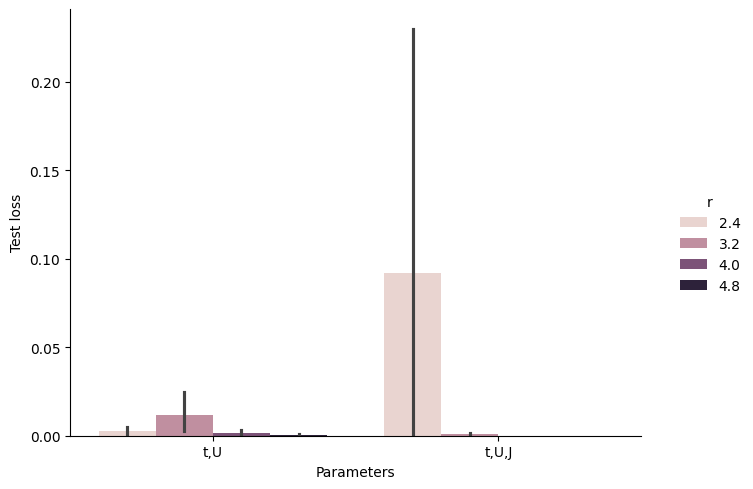

In [615]:
g= sns.catplot(data=df, x='Parameters', y='Test loss', kind='bar', hue = 'r')
g.fig.set_figwidth(8)

<Axes: xlabel='r', ylabel='model_gs'>

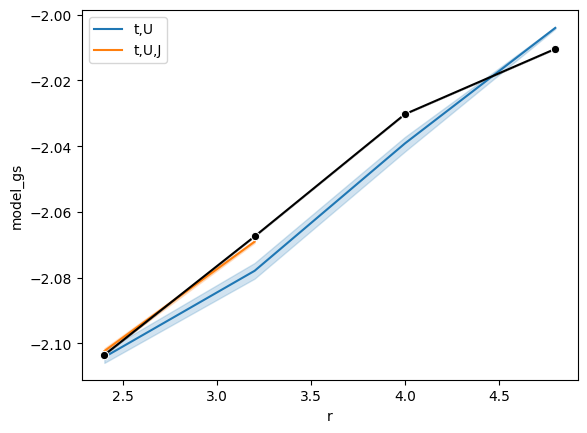

In [616]:
sns.lineplot(data=df, x='r', y='model_gs', hue='Parameters')
sns.lineplot(data=df, x='r', y='ai_gs', color='k', marker='o')

<Axes: xlabel='r', ylabel='model_gap'>

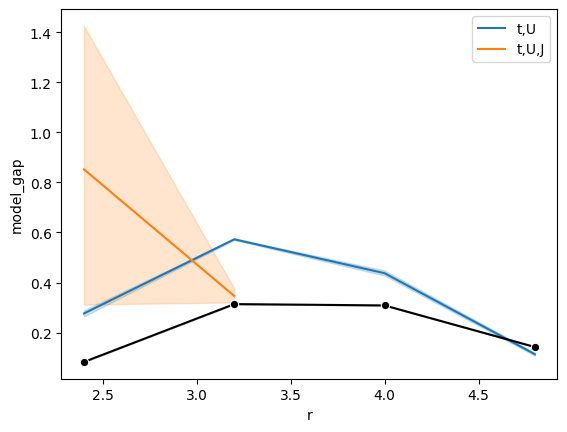

In [617]:
df['ai_gap'] = 27.2114*(df['ai_es'] - df['ai_gs'])
df['model_gap'] = 27.2114*(df['model_es'] - df['model_gs'])
sns.lineplot(data=df, x='r', y='model_gap', hue='Parameters')
sns.lineplot(data=df, x='r', y='ai_gap', color='k', marker='o')


<Axes: xlabel='r', ylabel='model_es'>

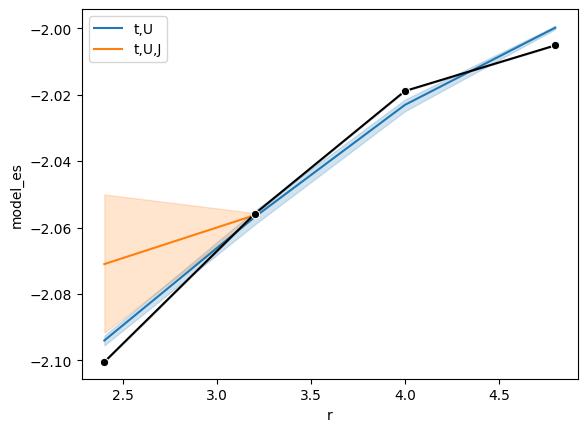

In [618]:
sns.lineplot(data=df, x='r', y='model_es', hue='Parameters')
sns.lineplot(data=df, x='r', y='ai_es', color='k', marker='o')

(0.0, 2.0)

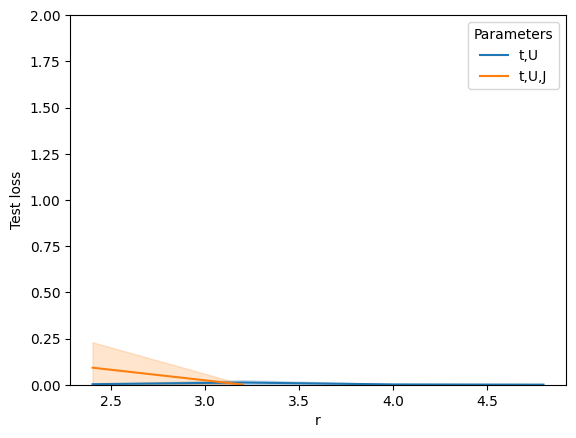

In [619]:
sns.lineplot(data=df, x='r', y='Test loss', hue='Parameters')
plt.ylim(0,2.0)

[0 1 2 3 4 5 6 7 8 9] 
 [0 1 2 4 3 6 5 8 7 9]


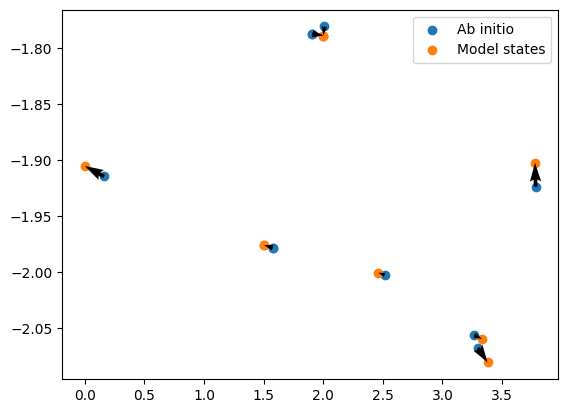

In [622]:
r = "r3.2"
state_cutoff = 10
df_ai = pd.read_csv(f"ai_data/{r}.csv")
df_ai = df_ai[df_ai.E0 > 3.7]
df_ai = df_ai[df_ai.U < 1.3]  # Need to remove the top two states from the 
df_ai = df_ai[df_ai.state < state_cutoff]
df_ai.reset_index()
with h5py.File(f"model_data_{state_cutoff}_0.7/E0_t_U_0_{r}.hdf5", 'r') as f:
    energy = f['train/descriptors/energy'][()]
    descriptors = {}
    for k in f['train/descriptors'].keys():
        descriptors[k] = f['train/descriptors'][k][()]
    row_ind = np.concatenate([f['row_ind'][()], f['test_rows'][()]])
    col_ind = np.concatenate([f['col_ind'][()], f['test_cols'][()]])
    data_states = np.where(row_ind < len(df_ai))[0]
    row_ind = row_ind[data_states]
    col_ind = col_ind[data_states]

    ntest = f['nstates_test'][()]
    ntrain = f['nstates_train'][()]
    distance = f["distance"][:]
    test_states = f["state_ind_for_test"][:]
    row_ind, col_ind = linear_sum_assignment(distance)
    row_ind = row_ind[:ntest+ntrain]
    col_ind = col_ind[:ntest+ntrain]

                             
print(row_ind, '\n', col_ind)
plt.scatter(df_ai['t'].values[row_ind], df_ai['energy'].values[row_ind], label='Ab initio')
plt.scatter(descriptors['t'][col_ind], descriptors['energy'][col_ind], label='Model states')
plt.quiver(df_ai['t'].values[row_ind], 
           df_ai['energy'].values[row_ind], 
           descriptors['t'][col_ind]-df_ai['t'].values[row_ind], 
           descriptors['energy'][col_ind]- df_ai['energy'].values[row_ind], 
           scale=1, scale_units='xy', angles ='xy')
plt.legend()

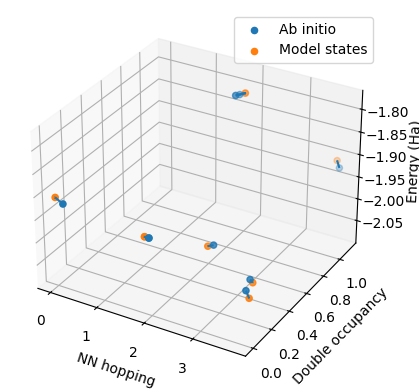

In [624]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(df_ai['t'].values[row_ind], df_ai['U'].values[row_ind], df_ai['energy'].values[row_ind], label='Ab initio')
ax.scatter(descriptors['t'][col_ind], descriptors['U'][col_ind], descriptors['energy'][col_ind], label='Model states')
ax.quiver(df_ai['t'].values[row_ind], 
          df_ai['U'].values[row_ind],
           df_ai['energy'].values[row_ind], 
           descriptors['t'][col_ind]-df_ai['t'].values[row_ind], 
            descriptors['U'][col_ind]-df_ai['U'].values[row_ind], 
           descriptors['energy'][col_ind]- df_ai['energy'].values[row_ind],
           arrow_length_ratio = 0.05,
)
ax.set_xlabel('NN hopping')
ax.set_ylabel('Double occupancy')
ax.set_zlabel('Energy (Ha)')
ax.legend()
plt.savefig("renorm_3d.pdf", bbox_inches='tight', transparent=True)
